<a href="https://colab.research.google.com/github/vishnubanna/stocktrader/blob/master/stock_analysis_nural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                Close    20 MAvg  ...  % change day     Volume
Date                              ...                         
2014-05-23  87.732857  87.033808  ...     -1.132976   58052400
2014-05-27  89.375717  87.619286  ...     -1.583104   87216500
2014-05-28  89.144287  87.924286  ...      0.321073   78870400
2014-05-29  90.768570  88.398333  ...     -1.199331   94118500
2014-05-30  90.428574  88.688368  ...      0.780585  141005200

[5 rows x 8 columns]                  Close     20 MAvg  ...  % change day    Volume
Date                                ...                        
2019-05-06  208.479996  203.871999  ...     -2.051007  32443100
2019-05-07  202.860001  204.009999  ...      1.466876  38763700
2019-05-08  202.899994  204.179999  ...     -0.495295  26339500
2019-05-09  200.720001  204.184999  ...     -0.159684  34908600
2019-05-10  197.179993  204.096499  ...      0.121571  41208700

[5 rows x 8 columns]


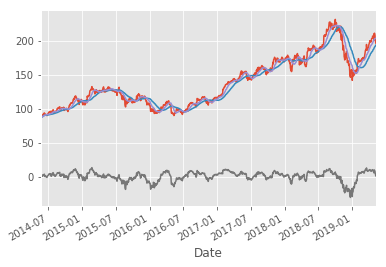

In [0]:
import pandas as pd
import numpy as np
import os
import datetime as dt
from pandas_datareader import data as pdr
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

data_file = "/content/drive/My Drive/Colab Notebooks/AAPL.csv"
df = pd.read_csv(data_file, parse_dates = True, index_col = 0)
#print(df.tail())

df['50 MAvg'] = df['Close'].rolling(window = 50, min_periods = 0).mean()
df['20 MAvg'] = df['Close'].rolling(window = 20, min_periods = 0).mean()
df['volitility'] = (df['Close']-df['50 MAvg'])/df['Close'] * 100

df['vshift'] = df['volitility'].shift(1)
df.dropna(0, inplace = True)
df['volSlope'] = df['volitility'] - df['vshift']

df['50MAshift'] = df['50 MAvg'].shift(1)
df.dropna(0, inplace = True)
df['50MASlope'] = (df['50 MAvg'] - df['50MAshift'])

df['% change day'] = (df['Open'] - df['Close']) / df['Open'] * 100
df['% daily volit'] = (df['High'] - df['Close']) / df['High'] * 100

#print(df.head())

df['Close'].plot()
df['50 MAvg'].plot()
df['20 MAvg'].plot()
df['volitility'].plot()

#df['volSlope'].plot()
#df['50MASlope'].plot()

#sell if 20 moving avg is larger than 50 option one
#sell if close is larger than 50 moving avg option two
#sell if the derivative volititility is negative
#if slope is positive buy/stay, if the slope is negative, sell option 3

df = df[['Close','20 MAvg','50 MAvg', 'Volume', 'volitility', '% daily volit','% change day' ,'Volume']]
print(df.head(), df.tail())




In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

df['test'] = df['20 MAvg'] - df['50 MAvg']

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

print(test)
print(close)

money = 100
stocks = 0
bought = 0
sells = 0 
holds = 0 
buys = 0
count = 0 
start = 100
buy_price = 100

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells):
  money = money + price * 0.95
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    #print(money, delt, price)
    if not (money < price):
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if price*0.95 > buy_price: #alpha condition
      money, stocks, sells = sell(money, price, stocks, sells)
      sells = sells + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
 
 
print(length, money, stocks, sells, holds, buys)
print(count)

profit = (money - start)/money * 100
print(profit) 

[ 0.          0.          0.         ... 11.10619884 10.59419902
 10.02509884]
[ 89.144287  90.76857   90.428574 ... 202.899994 200.720001 197.179993]
1248 105.87270719999998 0 2 1244 2
1248
5.546951008729831


In [0]:
df['20MAshift'] = df['20 MAvg'].shift(1)
print(df['20MAshift'].head())
df.dropna(0, inplace = True)
df['test'] = df['20 MAvg'] - df['20MAshift'] 
print(df['test'].head())

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

print(test)
print(close)

money = 100
stocks = 0
bought = 0
sells = 0 
holds = 0 
buys = 0
sell_price = 100

def buy(money, price, stocks, buys):
  money = money - price
  stocks = stocks + 1
  buys = buys + 1
  return money, stocks, buys

def sell(money, price, stocks, sells):
  money = money + price * 0.95
  stocks = stocks - 1
  sells = sells + 1
  return money, stocks, sells

def hold(holds):
  holds = holds + 1
  return holds

length = len(test)


for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    #print(money, delt, price)
    if not (money < price):
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if price*0.95 > buy_price:
      money, stocks, sells = sell(money, price, stocks, sells)
      sells = sells + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
 
 
print(length, money, stocks, sells, holds, buys)
print(count)

profit = (money - start)/money * 100
print(profit) 

Date
2014-05-28          NaN
2014-05-29    87.924286
2014-05-30    88.398333
2014-06-02    88.688368
2014-06-03    88.828215
Name: 20MAshift, dtype: float64
Date
2014-05-29    0.474047
2014-05-30    0.290034
2014-06-02    0.139847
2014-06-03    0.249881
2014-06-04    0.303905
Name: test, dtype: float64
[ 0.47404737  0.2900344   0.13984705 ...  0.1699997   0.0050003
 -0.0885002 ]
[ 90.76857   90.428574  89.807144 ... 202.899994 200.720001 197.179993]
1247 140.28042299999998 0 8 1239 4
2495
28.714215525283944


In [0]:
df['50MAshift'] = df['50 MAvg'].shift(1)
print(df['50MAshift'].head())
df.dropna(0, inplace = True)
df['test'] = df['50 MAvg'] - df['50MAshift']
print(df['test'].head())

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

print(test)
print(close)

money = 100
stocks = 0
bought = 0
sells = 0 
holds = 0 
buys = 0
sell_price = 100

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = buys + 1
  return money, stocks, buys

def sell(money, price, stocks, sells):
  money = money + price * 0.95
  stocks = stocks - 1
  sells = sells + 1
  return money, stocks, sells

def hold(holds):
  holds = holds + 1
  return holds

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    #print(money, delt, price)
    if not (money < price):
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if price*0.95 > buy_price:
      money, stocks, sells = sell(money, price, stocks, sells)
      sells = sells + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
 
 
print(length, money, stocks, sells, holds, buys)
print(count)

profit = (money - start)/money * 100
print(profit) 

Date
2014-05-23          NaN
2014-05-27    87.033808
2014-05-28    87.619286
2014-05-29    87.924286
2014-05-30    88.398333
Name: 50MAshift, dtype: float64
Date
2014-05-27    0.585477
2014-05-28    0.305000
2014-05-29    0.474047
2014-05-30    0.290034
2014-06-02    0.139847
Name: test, dtype: float64
[0.58547717 0.3050003  0.47404737 ... 0.57139984 0.51700012 0.48059998]
[ 89.375717  89.144287  90.76857  ... 202.899994 200.720001 197.179993]
1249 136.73077759999998 0 8 1241 4
4990
26.863576909841246


0.9659775683705529
[207.0430954  201.04935396 213.86429173 212.55677034 214.48105518
 210.96977115 204.20415791 204.67957653 200.41882784 196.12109165] 0.9659775683705529 10


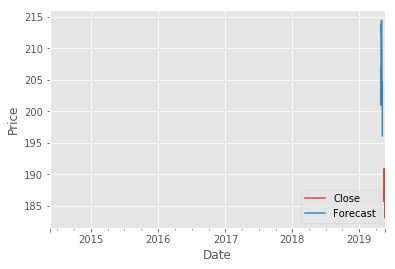

In [0]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

import datetime

forecast_col = 'Close'
df.fillna(-99999, inplace = True)
forecast_out = 10

df['Label'] = df[forecast_col].shift(-forecast_out)
#print(df.tail())

X = np.array(df.drop(['Label'], axis = 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] #forcastout = 30, (-)30 from the bottom 
X = X[:-forecast_out]

df.dropna(inplace = True)
y = np.array(df['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression(n_jobs = 10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 #seconds in a day
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix) #iterates through the forecast_set
    #makes the future features not a number
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #sets all the first colomns to not a numbers and make the last colomns what ever i is # rewatch to make sure
    #df.loc :: references the index of the data frame
    #the indec in this case is the date, so if the date doesn't exist it is saying make a date

data_file = "/content/drive/My Drive/Colab Notebooks/AAPLchek.csv"
dt = pd.read_csv(data_file, parse_dates = True, index_col = 0)

dt['Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [0]:
pip install tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
max = 1
X_train = X_train[:,:,np.newaxis]
y_train = y_train/max

X_test = X_test[:,:,np.newaxis]
y_test = y_test/max

tf.reshape(X_train, [X_train.shape[0],X_train.shape[1],1])
tf.reshape(y_train, [y_train.shape[0]])

tf.reshape(X_test, [X_test.shape[0],X_test.shape[1],1])
tf.reshape(y_test, [y_test.shape[0]])

print(X_train.shape, y_train.shape)

layers = [
    #tf.keras.layers.InputLayer(input_shape = (X_train.shape[1],1)),
    tf.keras.layers.Dense(units = 500, activation = tf.nn.relu, input_shape = (X_train.shape[1],1)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 250, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.linear)
]



#model = tf.keras.Sequential(layers)
model = tf.keras.Sequential(layers)

model.compile(optimizer = tf.optimizers.Adam(), 
             loss = tf.losses.MeanSquaredError())

model.fit(x = X_train, y = y_train, batch_size = 1, epochs = 10)
model.save_weights('weights.tf')

model.evaluate(x = X_test, y = y_test, batch_size = 1)


test_mod = tf.keras.Sequential(layers)
#test_mod.load_weights('weights.tf')

#predictions = test_mod.predict(X_lately[:,:,np.newaxis])
predictions = test_mod.predict(X_lately[:,:,np.newaxis])
#X_lately = X_lately[:,:]

#np.array(predictions)
tf.print(predictions)
np.array(predictions)
predictions = np.ndarray.flatten(predictions).tolist()

data_file = "/content/drive/My Drive/Colab Notebooks/AAPLchek.csv"
df = pd.read_csv(data_file, parse_dates = True, index_col = 0)

#predictions.plot()

plt.subplot(1, 2, 1)
df['Close'].plot()
plt.subplot(1, 2, 2)
plt.plot(predictions)

(992, 7, 1) (992,)
Epoch 1/10
992/992 [==============================] - 3s 3ms/sample - loss: 903515491351.7385
Epoch 2/10
992/992 [==============================] - 3s 3ms/sample - loss: 9752482905.5067
Epoch 3/10
992/992 [==============================] - 3s 3ms/sample - loss: 1043922949.4955
Epoch 4/10
992/992 [==============================] - 3s 3ms/sample - loss: 417925086.2212
Epoch 5/10
992/992 [==============================] - 3s 3ms/sample - loss: 153187560.1940
Epoch 6/10
992/992 [==============================] - 3s 3ms/sample - loss: 141783278.2944
Epoch 7/10
992/992 [==============================] - 3s 3ms/sample - loss: 72595191.6688
Epoch 8/10
992/992 [==============================] - 3s 3ms/sample - loss: 25628828.6944
Epoch 9/10
992/992 [==============================] - 3s 3ms/sample - loss: 61964880.7641
Epoch 10/10
248/248 [==============================] - 0s 1ms/sample - loss: 20872.8470


20872.84695139239